# Unifying concepts in statistics and class goals

There are a massive number of different statistical methods that, at first glance, may appear very different from another.
But many statistical methods depend on a small set of statistical concepts.

Statistical and Machine-learning (**S & ML**) techniques can be viewed as: (i) optimizing an intuitive objective function or (ii) optimizing a more rigorously defined probability over parameters. 
Optimization is a universal concept in S & ML techniques and can be a starting place to understanding more advanced methods.

The Bias-variance (**BV**) tradeoff is a fundemntal concept in all S & ML methods.
We will take a more visual approach to understanding the BV tradeoff and learn to use the BV tradeoff to compare S & ML methods.

## Lin Reg, KNN, and objective functions
Linear regression will be introduced and model learning will be motivated by minimizing the sum squares error (**SSE**).
K-nearest neighbors (**KNN**) regression will follow the the same, "model and learning", approach.

In groups, you will explore and discuss differences between linear regression and KNN regression.

## Likelihood
We will briefly tour how to construct a likelihood function and use this approach to show maximizing the likelihood for linear regression is equivalent to our more intuitive SSE approach.

## Bias variance tradeoff
Finally, the Bias-Variance (**BV**) tradeoff will be introduced and used to explain differences and similarities between linear regression and KNN regression.

# The Goal
The goal of this class is to give a brief tour of statistical methodology, and provide a small set of tools to be able to discuss these methods with quantitative, and non-quantitative others.

## The Data

We will assume we are given a dataset $\mathcal{D}$ that contains a target variable $y$ we are interested in predicting, and a set of covariates $X$ we can use to help predict our target $y$.
Our dataset $\mathcal{D}$ will have $N$ observations and $p$ different covariates.

Our data $\mathcal{D}$ can be placed in a matrix, where the observations correspond to rows, covariates are across columns, and an extra column is used for the target variable $y$.
$$
\mathcal{D} = \left[
\begin{array}{ccccccc|c}
x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} & y_{1} \\
x_{21} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} & y_{2} \\
x_{31} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} & y_{3} \\
\vdots &\vdots  \vdots   & \vdots & \vdots & \vdots   & \vdots & \vdots \\ 
x_{N1} & x_{N2} & x_{N3} & x_{N4} & x_{N5} & \cdots   & x_{NP} & y_{N}\\
\end{array}\right]
$$

On occasion we will discuss the matrix of covariates 
$$
X = \left[
\begin{array}{ccccccc}
x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} \\
x_{21} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} \\
x_{31} & x_{12} & x_{13} & x_{14} & x_{15} & \cdots   & x_{1P} \\
\vdots &\vdots  \vdots   & \vdots & \vdots & \vdots   & \vdots \\ 
x_{N1} & x_{N2} & x_{N3} & x_{N4} & x_{N5} & \cdots   & x_{NP} \\
\end{array}\right]
$$

or just the vector of target variables 
$$
Y = \left[
\begin{array}{ccccccc|c}
y_{1} \\
y_{2} \\
y_{3} \\
\vdots \\ 
y_{N}\\
\end{array}\right]
$$

The above is a common way S & ML literature defines a dataset, and we will use these above definitions throughout class.
Upcoming models will take as *input* $X$ and *output* a prediction of the target $y$.

## Lin Reg

Linear regression (LR) is a work-horse of statistics. 
This model serves as a foundation for more advanced methods, and is an excellent example to use when exploring concepts in S & ML.

The LR model takes two forms: model and probabilistic.

### The model

**Model Form**

The models form of linear regression is
\begin{align}
y_{i} &= \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots + \beta_{p}x_{ip} + \epsilon_{i}\\
\epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right)
\end{align}

This model assumes covariates linearly (**L**) relate to the target variable plus some noise $epsilon$.
Observations in LR are assumed independent of one another (**I**), predicting a target variable does not depend on other y-data already present.
The noise term $\epsilon$ is assumed to be distributed Normal (**N**) and equal (**E**) for different $x$ values.
These assumptions are often called the **LINE** assumptions.

We can also use the inner product to help define our model and write LR as
\begin{align}
y_{i} &= \beta_{0} + \beta'x_{i} + \epsilon_{i}\\
\epsilon &\sim \mathcal{N}\left(0,\sigma^{2}\right)
\end{align}
where 
$$
\beta = \left[\begin{array}{c}
\beta_{1}\\
\beta_{2}\\
\vdots\\
\beta_{p}
\end{array}\right]; 
%
x_{i} = \left[\begin{array}{c}
x_{i1}\\
x_{i2}\\
\vdots\\
x_{ip}
\end{array}\right]
$$
and the inner product is
$$
\beta'x_{i} = \sum_{p=1}^{P} \beta_{p}x_{ip}
$$

In model form, you emphasize how covariates ($x$s) relate to your target variable $y$.
The noise term is present but separate from the prediction.
An **advantage** of model form is that an audience can clearly understand the covariates used for prediction and how they relate to the target.
A **disadvantage** of model form is that the probability distribution over possible y values is harder to see.
Opposite of model form is probabilistic form.

**Probabilistic Form**

The probabilistic form for linear regression is 
\begin{align}
y_{i} &\sim \mathcal{N}\left[ \mu(x_{i}|\beta), \sigma^{2}\right]\\
\mu(x_{i}|\beta) &= \beta_{0} + \beta'x_{i} 
\end{align}
or 
\begin{align}
y_{i} &\sim \mathcal{N}\left(\beta_{0} + \beta'x_{i}, \sigma^{2}\right)\\
\end{align}

This model is a different way of expressing the same key concepts of LR.
Probabilistic form emphasizes, given a set of covariates (x-data), linear regression defines a probability over possible target values (y-values).
Opposite of model form, an **advantage** of probabilistic form is the emphasis on probabilistic predictions.
A **disadvantage** of probabilistic form is that can be more difficult to communicate to non-quantitative audiences.

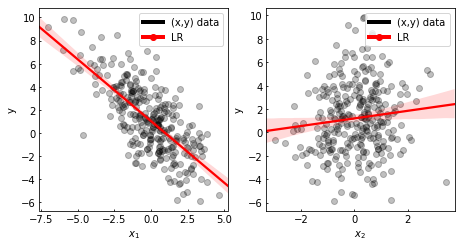

In [47]:
#simulate data
X = {'x1':[], 'x2':[]}
y = []

N = 300 # Number of observations (x,y) pairs

x1 = np.random.normal(0,2,N)
x2 = np.random.normal(0,1,N)

b0,b1,b2,sigma2 = 1., -1, 0.5, 2. 
y = b0 + b1*x1 + b2*x2 + np.random.normal(0,sigma2,N)

#plot of x-data versus y-data
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

fig,axs = plt.subplots(1,2)

ax = axs[0]
sns.regplot(x1,y,scatter_kws={'color':'k','alpha':0.25},line_kws={'color':'r'},ax=ax)
handles= [ Line2D([0], [0], color='k', lw=4)
          ,Line2D([0], [0], color='r', marker='o', lw=4)]
ax.legend(handles=handles,labels = ['(x,y) data','LR',])

ax.set(xlabel=r'$x_{1}$',ylabel='y')
ax.tick_params(direction='in',size=2.)


ax = axs[1]
sns.regplot(x2,y,scatter_kws={'color':'k','alpha':0.25},line_kws={'color':'r'},ax=ax)
ax.legend(handles=handles, labels = ['(x,y) data','LR'])

ax.set(xlabel=r'$x_{2}$',ylabel='y')
ax.tick_params(direction='in',size=2.)

#fig.set_tight_layout(True)
fig.set_size_inches(189/25.4,189/(2*25.4))


### Parameter learning

**Sum squares error**

$$
\text{SSE}(\beta|X,y) = \sum_{i=1}^{N}\left\{ \left[ y_{i} - \mu(x_{i}|\beta)\right]^{2}  \right\}
$$

$$
\text{SSE}(\beta|X,y) = (y-X\beta)'(y-X\beta)
$$
where $\beta$ includes $\beta_{0}$ and $X$ includes an extra column of all $1$s.


## KNN

### The model

**The distance function**
\begin{align}
d(a,b) &= d(b,a)\\
d(a,a) &= 0 \\
d(a,b) + d(b,c) &\le d(a,c)\\
\end{align}


### Parameter learning


## Likelihood

### For Lin Reg

### Looks familiar


## Comparing Lin Reg to KNN

## The Bias-variance tradeoff